<a href="https://colab.research.google.com/github/Sagalo04/EjerciciosPDI/blob/master/Ejercicios_Clases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/PDI/Ejemplos clase/'
os.chdir(path)
!pwd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/PDI/Ejemplos clase


In [0]:
def displayGray3(a,b,c,title1 = "Original", title2="Edited", title3="Edited"):
  plt.figure(figsize=(12,12))
  plt.subplot(131), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c,cmap='gray'), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayGray2(a,b,title1 = "Original", title2="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor3(a,b,c,title1 = "Original", title2="Edited", title3="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(131), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor2(a,b,title1 = "Original", title2="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def readRGB(imgPath):
  img=cv2.imread(imgPath)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

def histo(a,b,c):
  plt.figure(figsize=(12,3))
  plt.subplot(131), plt.plot(a,color='gray')
  plt.xlabel(['intensidad de iluminacion'])
  plt.ylabel(['cantidad de pixeles'])
  plt.subplot(132), plt.plot(b,color='gray')
  plt.xlabel(['intensidad de iluminacion'])
  plt.ylabel(['cantidad de pixeles'])
  plt.subplot(133), plt.plot(c,color='gray')
  plt.xlabel(['intensidad de iluminacion'])
  plt.ylabel(['cantidad de pixeles'])
  plt.show()



In [0]:
img1 = cv2.imread('c1.png', 0)
img2 = cv2.imread('c2.jpg', 0)
img3 = cv2.imread('s1.jpg', 0)
img4 = cv2.imread('s3.jpg', 0)

x1=np.array(255*((img1)/255)**0.15,dtype='uint8')
x2=np.array(255*((img2)/255)**0.25,dtype='uint8')
x3=np.array(255*((img3)/255)**0.15,dtype='uint8')
x4=np.array(255*((img4)/255)**3,dtype='uint8')

imgT1 = np.asarray(x1)
imgT2 = np.asarray(x2)
imgT3 = np.asarray(x3)
imgT4 = np.asarray(x4)

imgE1 = cv2.equalizeHist(imgT1)
imgE2 = cv2.equalizeHist(imgT2)
imgE3 = cv2.equalizeHist(imgT3)
imgE4 = cv2.equalizeHist(imgT4)

imgT1 = cv2.equalizeHist(img1)
imgT2 = cv2.equalizeHist(img2)
imgT3 = cv2.equalizeHist(img3)
imgT4 = cv2.equalizeHist(img4)

hist1 = cv2.calcHist([img1],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img2],[0],None,[256],[0,256])
hist3 = cv2.calcHist([img3],[0],None,[256],[0,256])
hist4 = cv2.calcHist([img4],[0],None,[256],[0,256])

histT1 = cv2.calcHist([imgT1],[0],None,[256],[0,256])
histT2 = cv2.calcHist([imgT2],[0],None,[256],[0,256])
histT3 = cv2.calcHist([imgT3],[0],None,[256],[0,256])
histT4 = cv2.calcHist([imgT4],[0],None,[256],[0,256])

histE1 = cv2.calcHist([imgE1],[0],None,[256],[0,256])
histE2 = cv2.calcHist([imgE2],[0],None,[256],[0,256])
histE3 = cv2.calcHist([imgE3],[0],None,[256],[0,256])
histE4 = cv2.calcHist([imgE4],[0],None,[256],[0,256])

displayGray3(img1,imgT1,imgE1,'Original','Transformada','Equalizada')
histo(hist1,histT1,histE1)
displayGray3(img2,imgT2,imgE2,'Original','Transformada','Equalizada')
histo(hist2,histT2,histE2)
displayGray3(img3,imgT3,imgE3,'Original','Transformada','Equalizada')
histo(hist3,histT3,histE3)
displayGray3(img4,imgT4,imgE4,'Original','Transformada','Equalizada')
histo(hist4,histT4,histE4)



In [0]:
img = cv2.imread('s1.jpg',0)

#crear mascara
mask = np.zeros(img.shape[:2], np.uint8)
mask[250:500,300:650]=255
masked_img = cv2.bitwise_and(img,img,mask = mask)

#calcular histograma con y sin mascara

hist_full = cv2.calcHist([img],[0], None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0], mask,[256],[0,256])

plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)

plt.show

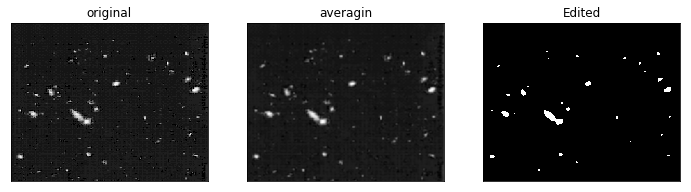

In [188]:
img = cv2.imread('manchas.PNG',0)

blur = cv2.blur(img,(5,5))

rows,columns = blur.shape

img2 = np.zeros((rows,columns),dtype = np.uint8)
  
T = 100
  
for x in range(rows):
  for y in range(columns):
    r = blur[x,y]
    if T>=r:
      img2[x,y]=0
    else:
      img2[x,y]=255

        
displayGray3(img,blur,img2,'original','averagin')
        
